# <center>Plataforma financiera BRCP </center>

análisis del tipo de cambio y el mercado inmobiliario puede requerir considerar otros factores como la inflación, tasas de interés, perspectivas económicas y legales, entre otros.

Inflacion
((IPC año de estudio - IPC del año anterior )/ ipc delmaño anterior )*100

In [41]:

#https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN38705PM/html
#PN38705PM: Índice de precios Lima Metropolitana (índice Dic.2021 = 100) 
#PN01255PM: Tipo de cambio nominal (S/ por canasta) - Promedio (var% mensual)

url_base="https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"
cod_ser="PN38705PM"
formato="/json"
url=url_base+cod_ser+formato
print(url)

#per="/2005-1/2019-12"
#url=url_base+cod_ser+formato+per

https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN38705PM/json


In [42]:
import requests
import json
response=requests.get(url)
data=response.json()
json_str = json.dumps(data, indent=4)
#print(json_str)

In [43]:
response_json=response.json()
#print(response_json) 


In [44]:
for key in response_json.keys():
    print(key)

config
periods


In [45]:
print(response_json['config'])

{'title': 'Índice de precios Lima Metropolitana (índice Dic.2021 = 100)', 'series': [{'name': 'Índice de precios Lima Metropolitana (índice Dic.2021 = 100) - Índice de Precios al Consumidor (IPC)', 'dec': '2'}]}


In [46]:
print(response_json['periods'])

[{'name': 'Jun.2021', 'values': ['95.9814390796482']}, {'name': 'Jul.2021', 'values': ['96.948489573628']}, {'name': 'Ago.2021', 'values': ['97.9033694822447']}, {'name': 'Sep.2021', 'values': ['98.2953966184284']}, {'name': 'Oct.2021', 'values': ['98.8691125131803']}, {'name': 'Nov.2021', 'values': ['99.2232454403164']}, {'name': 'Dic.2021', 'values': ['100']}, {'name': 'Ene.2022', 'values': ['100.037268']}, {'name': 'Feb.2022', 'values': ['100.34884']}, {'name': 'Mar.2022', 'values': ['101.836672']}, {'name': 'Abr.2022', 'values': ['102.816232']}, {'name': 'May.2022', 'values': ['103.211072']}, {'name': 'Jun.2022', 'values': ['104.439931']}, {'name': 'Jul.2022', 'values': ['105.422597']}, {'name': 'Ago.2022', 'values': ['106.125283']}, {'name': 'Sep.2022', 'values': ['106.679849']}, {'name': 'Oct.2022', 'values': ['107.050724']}, {'name': 'Nov.2022', 'values': ['107.604861']}, {'name': 'Dic.2022', 'values': ['108.459162']}, {'name': 'Ene.2023', 'values': ['108.704764']}, {'name': 'Fe

In [47]:
print(response_json['periods'][0])

{'name': 'Jun.2021', 'values': ['95.9814390796482']}


In [48]:
print(response_json['periods'][0]["values"])

['95.9814390796482']


In [49]:
#print(response_json.get("periods"))  #el método get me da un resultado parecido a response_json['periods']
periodos=response_json.get("periods")
price_index=[]
for i in periodos:
    valores_list=i['values']
    for w in valores_list:
        w=float(w)
        price_index.append(w)
    
#print(type(price_index[0]))
print(price_index)

[95.9814390796482, 96.948489573628, 97.9033694822447, 98.2953966184284, 98.8691125131803, 99.2232454403164, 100.0, 100.037268, 100.34884, 101.836672, 102.816232, 103.211072, 104.439931, 105.422597, 106.125283, 106.679849, 107.050724, 107.604861, 108.459162, 108.704764, 109.024924, 110.391537, 111.005592, 111.358436]


In [50]:
fechas=[]
for i in periodos:
    nombres=i['name']
    fechas.append(nombres)
    
print(fechas)

['Jun.2021', 'Jul.2021', 'Ago.2021', 'Sep.2021', 'Oct.2021', 'Nov.2021', 'Dic.2021', 'Ene.2022', 'Feb.2022', 'Mar.2022', 'Abr.2022', 'May.2022', 'Jun.2022', 'Jul.2022', 'Ago.2022', 'Sep.2022', 'Oct.2022', 'Nov.2022', 'Dic.2022', 'Ene.2023', 'Feb.2023', 'Mar.2023', 'Abr.2023', 'May.2023']


In [51]:
import pandas as pd

In [52]:
diccionario= {"Fechas":fechas, "Valores":price_index}
print(diccionario)

{'Fechas': ['Jun.2021', 'Jul.2021', 'Ago.2021', 'Sep.2021', 'Oct.2021', 'Nov.2021', 'Dic.2021', 'Ene.2022', 'Feb.2022', 'Mar.2022', 'Abr.2022', 'May.2022', 'Jun.2022', 'Jul.2022', 'Ago.2022', 'Sep.2022', 'Oct.2022', 'Nov.2022', 'Dic.2022', 'Ene.2023', 'Feb.2023', 'Mar.2023', 'Abr.2023', 'May.2023'], 'Valores': [95.9814390796482, 96.948489573628, 97.9033694822447, 98.2953966184284, 98.8691125131803, 99.2232454403164, 100.0, 100.037268, 100.34884, 101.836672, 102.816232, 103.211072, 104.439931, 105.422597, 106.125283, 106.679849, 107.050724, 107.604861, 108.459162, 108.704764, 109.024924, 110.391537, 111.005592, 111.358436]}


In [53]:
df = pd.DataFrame(diccionario)
df
df.to_csv('Df_grafic1.csv', index=False)

- Una baja en el IPC puede indicar una disminución en la tasa de inflación

    -> más conveniente comprar la casa en soles en lugar de en dólares.
    
- Una subida en el IPC puede indicar un aumento en la tasa de inflación

    -> más conveniente comprar la casa en la dolares en lugar de en soles.
    

In [18]:
def Dolares_o_soles(a):
    ultimos_dos_valores = df[a].tail(2)
    x= ultimos_dos_valores.iloc[0]  
    y= ultimos_dos_valores.iloc[1]
    if x > y:
        return("Conveniente comprar la casa en la dolares .")
    elif x==y:
        return("Los valores son iguales al mes anterior, puedes comprar en dolares o soles")
    else:
        return("Conveniente comprar la casa en soles.")


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

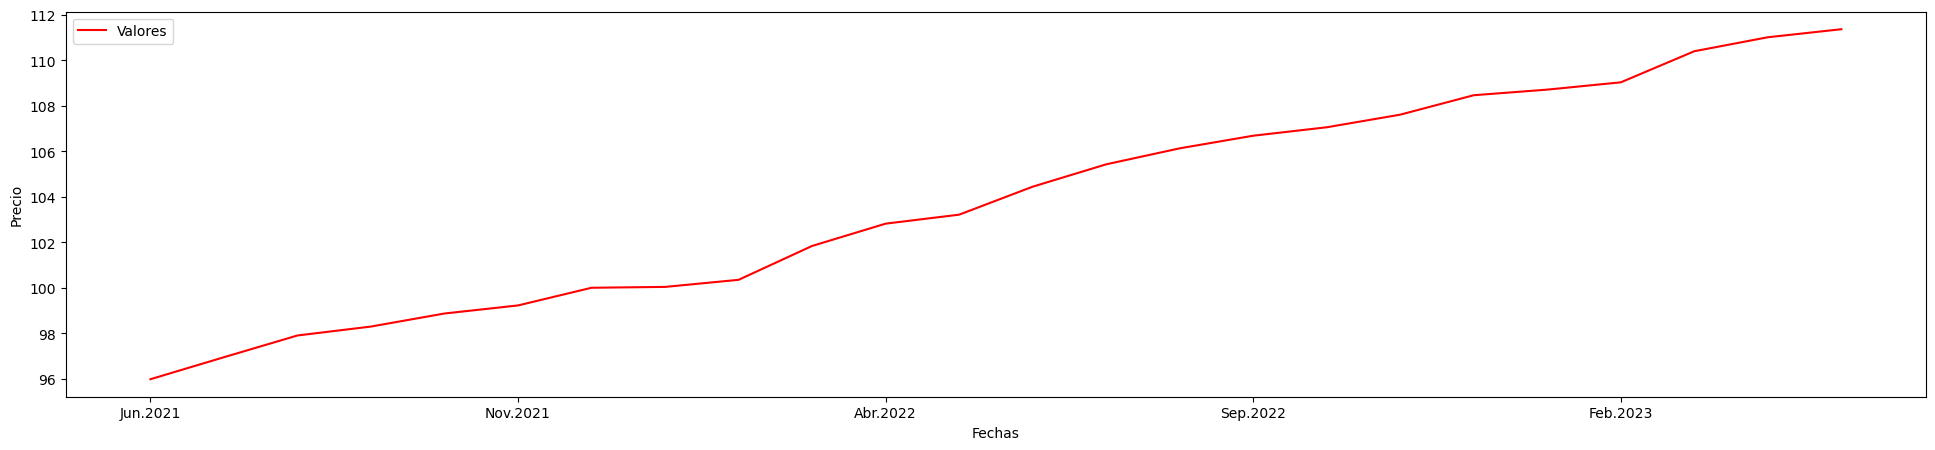

In [20]:
#df.plot(x ='Fechas', y='Valores', figsize=(15, 5), kind = 'line')
#plt.xlabel("Fechas")
#plt.ylabel("IPC")
#plt.show()

import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con una columna 'Fechas' y una columna 'Valores'

df.plot(x='Fechas', y='Valores', figsize=(len(df['Fechas']), 5), kind='line',color='red')
plt.xlabel("Fechas")
plt.ylabel("Precio")
plt.show()


In [21]:
Dolares_o_soles("Valores")

'Conveniente comprar la casa en soles.'

Tipo de cambio nominal:
Es el precio de una moneda extranjera en términos de una moneda nacional. Por ejemplo, cuando nos referimos al tipo de cambio sol-dólar, corresponde al número de soles que se requieren para comprar un dólar.

In [22]:
#https://estadisticas.bcrp.gob.pe/estadisticas/series/diarias/resultados/PD04637PD/html
# PD04637PD: Tipo de cambio - TC Interbancario (S/ por US$) - Compra
urls_base="https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"
cod_ser="PD04637PD"
formato="/json"
per="/2000-1"
urls=urls_base+cod_ser+formato
print(urls)


https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD04637PD/json


In [23]:
import requests
import json
responses=requests.get(urls)
dato=responses.json()
jsons_str = json.dumps(dato, indent=4)
#print(jsons_str)

In [24]:
responses_json=responses.json()
print(responses_json) 


{'config': {'title': 'Tipo de cambio', 'series': [{'name': 'Tipo de cambio - TC Interbancario (S/ por US$) - Compra', 'dec': '3'}]}, 'periods': [{'name': '17.May.23', 'values': ['3.69266666666667']}, {'name': '18.May.23', 'values': ['3.70066666666667']}, {'name': '19.May.23', 'values': ['3.6875']}, {'name': '22.May.23', 'values': ['3.68933333333333']}, {'name': '23.May.23', 'values': ['3.69183333333333']}, {'name': '24.May.23', 'values': ['3.685']}, {'name': '25.May.23', 'values': ['3.6915']}, {'name': '26.May.23', 'values': ['3.66966666666667']}, {'name': '29.May.23', 'values': ['3.67016666666667']}, {'name': '30.May.23', 'values': ['3.67233333333333']}, {'name': '31.May.23', 'values': ['3.6775']}, {'name': '01.Jun.23', 'values': ['3.68033333333333']}, {'name': '02.Jun.23', 'values': ['3.6835']}, {'name': '05.Jun.23', 'values': ['3.67616666666667']}, {'name': '06.Jun.23', 'values': ['3.68833333333333']}, {'name': '07.Jun.23', 'values': ['3.66816666666667']}, {'name': '08.Jun.23', 'val

In [25]:
for key in responses_json.keys():
    print(key)

config
periods


In [26]:
print(responses_json['config'])

{'title': 'Tipo de cambio', 'series': [{'name': 'Tipo de cambio - TC Interbancario (S/ por US$) - Compra', 'dec': '3'}]}


In [27]:
print(responses_json['periods'])

[{'name': '17.May.23', 'values': ['3.69266666666667']}, {'name': '18.May.23', 'values': ['3.70066666666667']}, {'name': '19.May.23', 'values': ['3.6875']}, {'name': '22.May.23', 'values': ['3.68933333333333']}, {'name': '23.May.23', 'values': ['3.69183333333333']}, {'name': '24.May.23', 'values': ['3.685']}, {'name': '25.May.23', 'values': ['3.6915']}, {'name': '26.May.23', 'values': ['3.66966666666667']}, {'name': '29.May.23', 'values': ['3.67016666666667']}, {'name': '30.May.23', 'values': ['3.67233333333333']}, {'name': '31.May.23', 'values': ['3.6775']}, {'name': '01.Jun.23', 'values': ['3.68033333333333']}, {'name': '02.Jun.23', 'values': ['3.6835']}, {'name': '05.Jun.23', 'values': ['3.67616666666667']}, {'name': '06.Jun.23', 'values': ['3.68833333333333']}, {'name': '07.Jun.23', 'values': ['3.66816666666667']}, {'name': '08.Jun.23', 'values': ['3.65416666666667']}, {'name': '09.Jun.23', 'values': ['3.64283333333333']}, {'name': '12.Jun.23', 'values': ['3.65183333333333']}, {'nam

In [28]:
print(responses_json['periods'][0])

{'name': '17.May.23', 'values': ['3.69266666666667']}


In [29]:
print(responses_json['periods'][0]["values"])

['3.69266666666667']


In [30]:
#print(responses_json.get("periods"))  #el método get me da un resultado parecido a response_json['periods']
periodos=responses_json.get("periods")
price_index=[]
for i in periodos:
    valores_list=i['values']
    for w in valores_list:
        w=float(w)
        price_index.append(w)
    
#print(type(price_index[0]))
print(price_index)

[3.69266666666667, 3.70066666666667, 3.6875, 3.68933333333333, 3.69183333333333, 3.685, 3.6915, 3.66966666666667, 3.67016666666667, 3.67233333333333, 3.6775, 3.68033333333333, 3.6835, 3.67616666666667, 3.68833333333333, 3.66816666666667, 3.65416666666667, 3.64283333333333, 3.65183333333333, 3.64333333333333, 3.64716666666667, 3.649, 3.63166666666667, 3.63216666666667, 3.6435, 3.64033333333333, 3.63466666666667, 3.6315, 3.63883333333333, 3.63566666666667]


In [31]:
fechas=[]
for i in periodos:
    nombres=i['name']
    fechas.append(nombres)
    
print(fechas)

['17.May.23', '18.May.23', '19.May.23', '22.May.23', '23.May.23', '24.May.23', '25.May.23', '26.May.23', '29.May.23', '30.May.23', '31.May.23', '01.Jun.23', '02.Jun.23', '05.Jun.23', '06.Jun.23', '07.Jun.23', '08.Jun.23', '09.Jun.23', '12.Jun.23', '13.Jun.23', '14.Jun.23', '15.Jun.23', '16.Jun.23', '19.Jun.23', '20.Jun.23', '21.Jun.23', '22.Jun.23', '23.Jun.23', '26.Jun.23', '27.Jun.23']


In [32]:
diccionario= {"Fechas":fechas, "Valores":price_index}
print(diccionario)

{'Fechas': ['17.May.23', '18.May.23', '19.May.23', '22.May.23', '23.May.23', '24.May.23', '25.May.23', '26.May.23', '29.May.23', '30.May.23', '31.May.23', '01.Jun.23', '02.Jun.23', '05.Jun.23', '06.Jun.23', '07.Jun.23', '08.Jun.23', '09.Jun.23', '12.Jun.23', '13.Jun.23', '14.Jun.23', '15.Jun.23', '16.Jun.23', '19.Jun.23', '20.Jun.23', '21.Jun.23', '22.Jun.23', '23.Jun.23', '26.Jun.23', '27.Jun.23'], 'Valores': [3.69266666666667, 3.70066666666667, 3.6875, 3.68933333333333, 3.69183333333333, 3.685, 3.6915, 3.66966666666667, 3.67016666666667, 3.67233333333333, 3.6775, 3.68033333333333, 3.6835, 3.67616666666667, 3.68833333333333, 3.66816666666667, 3.65416666666667, 3.64283333333333, 3.65183333333333, 3.64333333333333, 3.64716666666667, 3.649, 3.63166666666667, 3.63216666666667, 3.6435, 3.64033333333333, 3.63466666666667, 3.6315, 3.63883333333333, 3.63566666666667]}


In [37]:
Df = pd.DataFrame(diccionario)
Df
Df.to_csv('Df.csv', index=False)


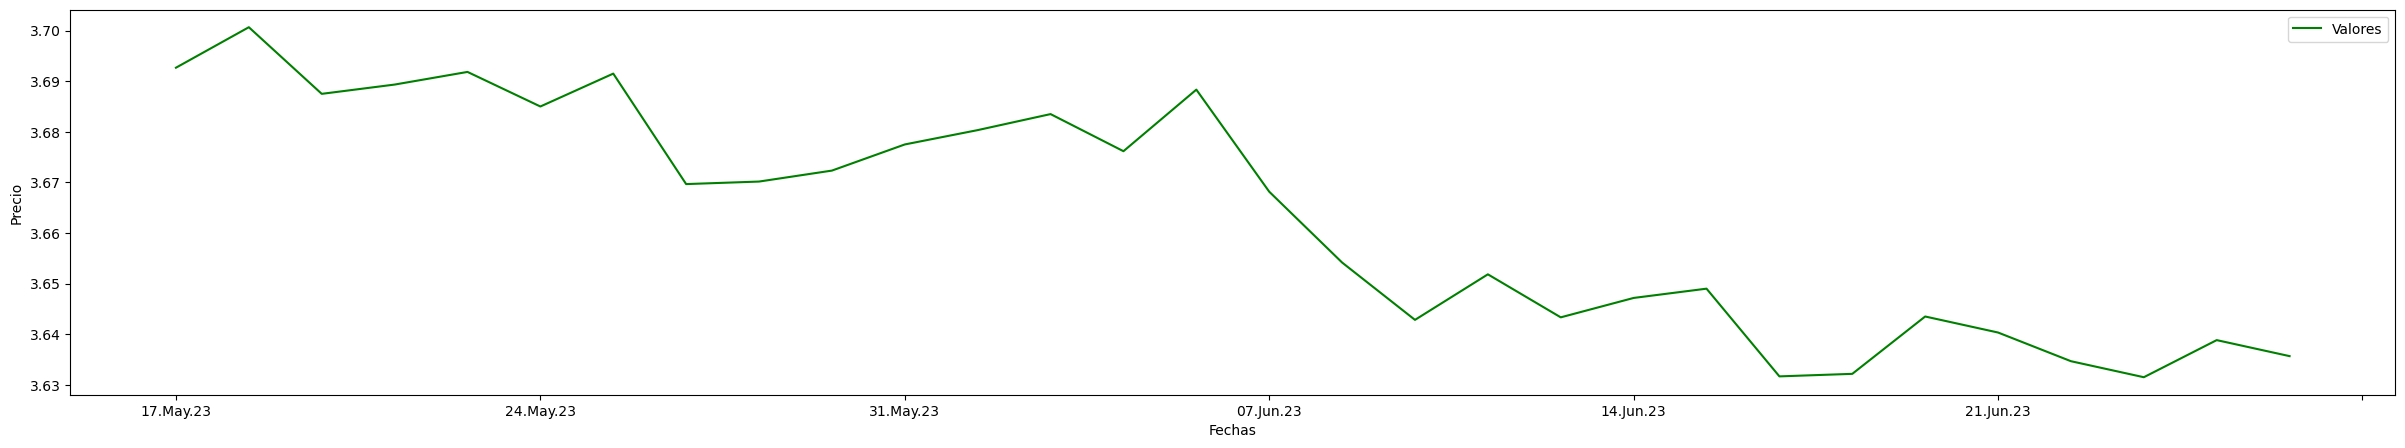

In [34]:
#Df.plot(x ='Fechas', y='Valores', figsize=(15, 5), kind = 'line')
#plt.xlabel("Fechas")
#plt.ylabel("Precio")
#plt.show()

import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con una columna 'Fechas' y una columna 'Valores'

Df.plot(x='Fechas', y='Valores', figsize=(len(Df['Fechas']), 5), kind='line',color='green')
plt.xlabel("Fechas")
plt.ylabel("Precio")
plt.show()



In [35]:
def dolares_o_soles(a):
    ultimos_dos_valores = Df[a].tail(2)
    x= ultimos_dos_valores.iloc[0]  
    y= ultimos_dos_valores.iloc[1]
    if x > y:
        return("Conveniente comprar la casa en la dolares .")
    elif x==y:
        return("Los valores son iguales al mes anterior, puedes comprar en dolares o soles")
    else:
        return("Conveniente comprar la casa en soles.")

In [36]:
dolares_o_soles("Valores")

'Conveniente comprar la casa en la dolares .'